In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import urllib

city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data=pd.read_csv(city_data_to_load)
ride_data=pd.read_csv(ride_data_to_load)

In [2]:
# Display some data attributes to properly develop processing logic
print(type(city_data), len(city_data))
print(city_data[city_data['city']=="Port Angela"])
city_data.head()

<class 'pandas.core.frame.DataFrame'> 120
          city  driver_count   type
2  Port Angela            67  Urban


,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [3]:
# Some additional data attributes to help with processing logic development
print(type(ride_data), len(ride_data))
print()
ride_data.head()

<class 'pandas.core.frame.DataFrame'> 2375



,city,date,fare,ride_id
0,Lake Jonathanshire,1/14/2018 10:14,13.83,5739410935873
1,South Michelleport,3/4/2018 18:24,30.24,2343912425577
2,Port Samanthamouth,2/24/2018 4:29,33.44,2005065760003
3,Rodneyfort,2/10/2018 23:22,23.44,5149245426178
4,South Jack,3/6/2018 4:28,34.58,3908451377344


In [4]:
# Combine the data into a single data set
city_n_rides=city_data.merge(ride_data, on="city", how="outer")

In [5]:
# Display the data tables and their attributes for confirmation
print(type(city_data), len(city_data))
print(type(ride_data), len(ride_data))
print(type(city_n_rides), len(city_n_rides))
city_n_rides.head()

<class 'pandas.core.frame.DataFrame'> 120
<class 'pandas.core.frame.DataFrame'> 2375
<class 'pandas.core.frame.DataFrame'> 2375


,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2/24/2018 8:40,13.93,5628545007794
1,Richardfort,38,Urban,2/13/2018 12:46,14.00,910050116494
2,Richardfort,38,Urban,2/16/2018 13:52,17.92,820639054416
3,Richardfort,38,Urban,2/1/2018 20:18,10.26,9554935945413
4,Richardfort,38,Urban,4/17/2018 2:26,23.00,720020655850


In [6]:
# To make sure that all "cities" are accounted for in both data sets
unq_cities=city_n_rides["city"].unique()
print(type(unq_cities), len(unq_cities))
number_of_cities=len(city_data)
if not number_of_cities==len(unq_cities):
    print("/n/n/n Problems    Problems     Problems /n Descrepency in City Names \
          between two data sets")
    # Should kick out of the program under controlled options
    # But have not learned that, yet!

<class 'numpy.ndarray'> 120


In [7]:
# Doing away with non-essential data columns as far as current processing is concerned
cnr=city_n_rides.drop(["ride_id","date"], axis=1)
cnr.head()

,city,driver_count,type,fare
0,Richardfort,38,Urban,13.93
1,Richardfort,38,Urban,14.00
2,Richardfort,38,Urban,17.92
3,Richardfort,38,Urban,10.26
4,Richardfort,38,Urban,23.00


In [8]:
# Getting data for inclusion in the report
print(cnr[cnr["type"]=="Urban"]["fare"].agg(["count","sum","mean","max","min"]))
print(cnr[cnr["type"]=="Suburban"]["fare"].agg(["count","sum","mean","max","min"]))
print(cnr[cnr["type"]=="Rural"]["fare"].agg(["count","sum","mean","max","min"]))

count     1625.000000
sum      39854.380000
mean        24.525772
max         44.970000
min          4.050000
Name: fare, dtype: float64
count      625.000000
sum      19356.330000
mean        30.970128
max         49.960000
min         12.050000
Name: fare, dtype: float64
count     125.00000
sum      4327.93000
mean       34.62344
max        58.55000
min        10.11000
Name: fare, dtype: float64


In [9]:
# Just checking up on data integrirty and consistency
thisCity="Garzaport"
print(city_data[city_data["city"]==thisCity])
print(ride_data[ride_data["city"]==thisCity])
print(city_n_rides[city_n_rides["city"]==thisCity])
print(cnr[cnr["city"]==thisCity])

          city  driver_count   type
114  Garzaport             7  Rural
           city             date   fare        ride_id
2256  Garzaport  2/18/2018 18:27  36.16  2928337561347
2298  Garzaport   4/17/2018 1:48  17.31  6092414045061
2350  Garzaport   5/6/2018 16:57  18.90  8826696981094
           city  driver_count   type             date   fare        ride_id
2341  Garzaport             7  Rural  2/18/2018 18:27  36.16  2928337561347
2342  Garzaport             7  Rural   4/17/2018 1:48  17.31  6092414045061
2343  Garzaport             7  Rural   5/6/2018 16:57  18.90  8826696981094
           city  driver_count   type   fare
2341  Garzaport             7  Rural  36.16
2342  Garzaport             7  Rural  17.31
2343  Garzaport             7  Rural  18.90


In [10]:
# Prepare data for creating plotting data 
drivers=city_data["driver_count"]
city_type=city_data["type"]
zeros_list=[]
for x in range(number_of_cities):
        zeros_list.append(0)

fares=dict(zip(unq_cities,zeros_list)) 
rides=dict(zip(unq_cities,zeros_list))

In [11]:
# Extracting fare and number of rides info
#print(index, row['city'], row['driver_count'], row['type'], row['fare'])
for index, row in cnr.iterrows():
    fares[row[0]] += row[3]
    rides[row[0]] += 1

In [12]:
# Preperation of Plotting Data: Total # of Rides Per City and Average Fare
xvals=[]
yvals=[]
for x in range(number_of_cities):
    thiscity=unq_cities[x]
    nrides=rides[thiscity]
    avg=fares[thiscity]/nrides
    xvals.append(nrides)
    yvals.append(avg)

In [13]:
# Creating a DataFrame
uq_sr=pd.Series(unq_cities, name="City")
xv_sr=pd.Series(xvals, name="Total Rides")
yv_sr=pd.Series(yvals, name="Avg Fare")
sv_sr=pd.Series(drivers, name="Drivers")
tv_sr=pd.Series(city_type, name="Area Type")
xy_pd=pd.concat([uq_sr, xv_sr, yv_sr, sv_sr, tv_sr], axis=1, ignore_index=True)

xy_pd.head()


,0,1,2,3,4
0,Richardfort,28,22.373214,38,Urban
1,Williamsstad,23,24.362174,59,Urban
2,Port Angela,19,23.836842,67,Urban
3,Rodneyfort,23,28.616957,34,Urban
4,West Robert,31,25.123871,39,Urban


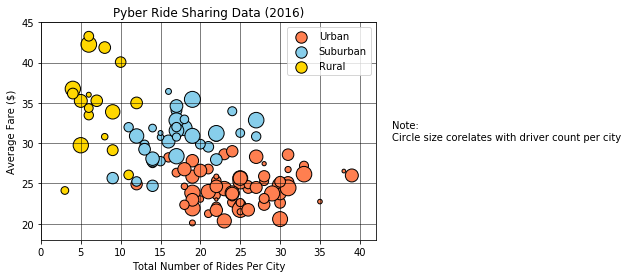

In [14]:
#Plots: Pyber color scheme (Gold, SkyBlue, and Coral) in producing your plot and pie charts.
scalefactor=3.5
xlimit=(0, 42)
ylimit=(18, 45)

fig, ax = plt.subplots()

#xy_pd.plot(kind='scatter', x=1, y=2, s=xy_pd[3]*scalefactor, color="black", xlim=(xlimit), ylim=(ylimit), label="ALL" )

xy_pd[xy_pd[4]=="Urban"].plot(kind='scatter', x=1, y=2, s=xy_pd[3]*scalefactor, color="coral", edgecolor="k",
                              xlim=(xlimit), ylim=(ylimit), label="Urban", ax=ax)
xy_pd[xy_pd[4]=="Suburban"].plot(kind='scatter', x=1, y=2, s=xy_pd[3]*scalefactor, color="skyblue", edgecolor="k",
                              xlim=(xlimit), ylim=(ylimit), label="Suburban", ax=ax) 
xy_pd[xy_pd[4]=="Rural"].plot(kind='scatter', x=1, y=2, s=xy_pd[3]*scalefactor, color="gold", edgecolor="k",
                              xlim=(xlimit), ylim=(ylimit), label="Rural", ax=ax)


plt.title('Pyber Ride Sharing Data (2016)') 
plt.xlabel('Total Number of Rides Per City') 
plt.ylabel('Average Fare ($)') 
note="Note:\nCircle size corelates with driver count per city"
ax.text(1.05, .5, note, horizontalalignment='left',verticalalignment='center', 
                     transform=ax.transAxes)
plt.grid(color='k', linestyle='-', linewidth=0.5)

plt.savefig('Pyber_Ride_Data_Analysis.png')


In [15]:
# Preparation and organization of data for Pie Charts
tmp_data=cnr[cnr["type"]=="Urban"]
fare_urban=tmp_data["fare"].sum()
count_urban=tmp_data["fare"].count()

tmp_data=cnr[cnr["type"]=="Suburban"]
fare_suburban=tmp_data["fare"].sum()
count_suburban=tmp_data["fare"].count()

tmp_data=cnr[cnr["type"]=="Rural"]
fare_rural=tmp_data["fare"].sum()
count_rural=tmp_data["fare"].count()

tmp_data=city_data[city_data["type"]=="Urban"]
drivers_urban=tmp_data["driver_count"].sum()
tmp_data=city_data[city_data["type"]=="Suburban"]
drivers_suburban=tmp_data["driver_count"].sum()
tmp_data=city_data[city_data["type"]=="Rural"]
drivers_rural=tmp_data["driver_count"].sum()

# Numbers that will be provided to pie charting routines 
print(fare_urban, fare_suburban, fare_rural)
print(count_urban, count_suburban, count_rural)
print(drivers_urban, drivers_suburban, drivers_rural)

# Setting common factors
pieradius=1.2

39854.380000000005 19356.33 4327.929999999999
1625 625 125
2405 490 78


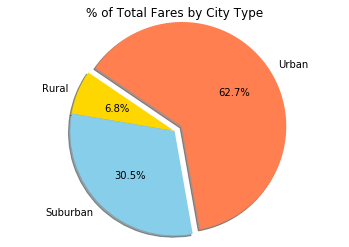

In [16]:
# Pie Chart: % of Total Fares by City Type

# Plot Attributes
labels = ['Urban', 'Rural', 'Suburban']
sizes = [fare_urban,fare_rural,fare_suburban ]
colors = ['coral', 'gold', 'skyblue']
explode = (0.1, 0, 0)  
plt.axis('equal')
plt.title('% of Total Fares by City Type') 

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
               autopct='%1.1f%%', shadow=True, startangle=-80, radius=pieradius)

plt.savefig('Total_Fares_by_City_Type.png')
plt.show()

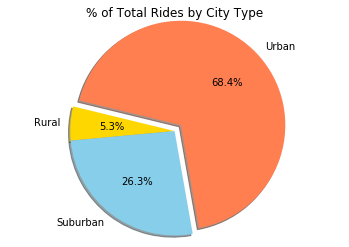

In [17]:
# Pie Chart: % of Total Rides by City Type

# Plot Attributes
labels = ['Urban', 'Rural', 'Suburban']
sizes = [count_urban,count_rural,count_suburban ]
colors = ['coral', 'gold', 'skyblue']
explode = (0.1, 0, 0)  
plt.axis('equal')
plt.title('% of Total Rides by City Type') 

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
               autopct='%1.1f%%', shadow=True, startangle=-80, radius=pieradius)

plt.savefig('Total_Rides_by_City_Type.png')
plt.show()

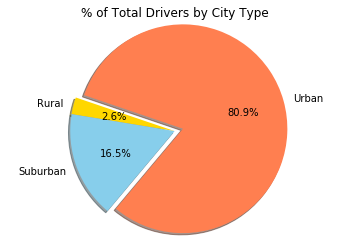

In [18]:
# Pie Chart: % of Total Drivers by City Type

# Plot Attributes
labels = ['Urban', 'Rural', 'Suburban']
sizes = [drivers_urban,drivers_rural,drivers_suburban ]
colors = ['coral', 'gold', 'skyblue']
explode = (0.1, 0, 0)  
plt.axis('equal')
plt.title('% of Total Drivers by City Type') 

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
               autopct='%1.1f%%', shadow=True, startangle=-130, radius=pieradius)

plt.savefig('Total_Drivers_by_City_Type.png')
plt.show()